Exercise Sheet No. 5

Exercise 1: Spin correlations of the one-dimensional Heisenberg modeL

**Xiongxiao Wang, Pulkit Kukreja**

Here we focus on the isotropic Heisenberg model in dimension d = 1 with open
boundary conditions
$$H = -J \sum_{i = 1}^{N-1} \vec S_{i} \vec S_{i+1}$$
with J = −1 (the antiferromagnetic case). We are interested in the spin correlations
between sites 1 and n, $\chi_{1n} = <\vec S_{1} \cdot \vec S_{n}>$, for both zero and finite temperature.


a)Calculate $\chi_{1n} = <\psi_g | \vec S_1 \cdot \vec S_n| \psi_g>$ for the ground state $|\psi_g>$ of a Heisenberg chain
with N = 10 sites and n = 1, . . . , 10. Note that for an even number of sites N,
the ground state of the antiferromagnetic Heisenberg chain is non-degenerate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd

In [2]:
def Hmatrix(N,J_x,J_y,J_z):
    n_states = 2**N
    matrix = np.zeros((n_states,n_states))
    for n in range(n_states):
        z = np.zeros(N,dtype = int)
        nz = n
        for z_i in range(N):      
            if nz//2 >= 0:
                z[z_i] = nz%2 
                nz = nz//2

        for p in range(1,N+1):
            for q in range(p+1,N+1):
                s = (2*z[p-1]-1)*(2*z[q-1]-1)
                l =n + (1-2*z[p-1])*2**(p-1) + (1-2*z[q-1])*2**(q-1)
                x_link =  0.25*  J_x[p-1,q-1]
                y_link = -0.25*s*J_y[p-1,q-1]
                z_link =  0.25*s*J_z[p-1,q-1]
            
                matrix[l,n]-= x_link
                matrix[l,n]-= y_link
                matrix[n,n]-= z_link
    return(matrix)

To calculate the ground state we use the code from last assigment and pay attention that the H only consider the neighboring sites
$$H = -J \sum_{i = 1}^{N-1} \vec S_{i} \vec S_{i+1}$$


[[2.25 0.   0.   ... 0.   0.   0.  ]
 [0.   1.75 0.5  ... 0.   0.   0.  ]
 [0.   0.5  1.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.25 0.5  0.  ]
 [0.   0.   0.   ... 0.5  1.75 0.  ]
 [0.   0.   0.   ... 0.   0.   2.25]]
The ground state is  [0.        +0.j 0.        +0.j 0.        +0.j ... 0.01893372+0.j
 0.        +0.j 0.        +0.j]


C:\Users\Xiongxiao Wang\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Xiongxiao Wang\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'probability amplitude ')

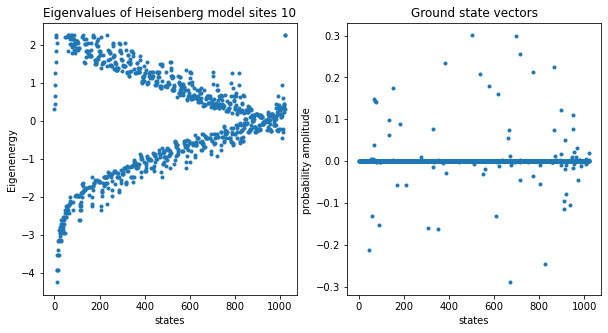

In [3]:
# Isotropic Heisenberg model with neighboing sites, set N = 10, J=-1

N=10

J_x_model = np.zeros((2**N,2**N))
J_y_model = np.zeros((2**N,2**N))
J_z_model = np.zeros((2**N,2**N))
for i in range(N-1):
    J_x_model[i,i+1] = -1
    J_y_model[i,i+1] = -1
    J_z_model[i,i+1] = -1

H_model = Hmatrix(N,J_x_model,J_y_model,J_z_model)
w_model,v_model = LA.eig(H_model)
print(H_model)

ground_indice = np.argmin(w_model)
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(w_model,'.')
ax[0].set_title('Eigenvalues of Heisenberg model sites '+str(N))
ax[0].set_xlabel('states')
ax[0].set_ylabel('Eigenenergy')
ground_state = v_model[ground_indice]
print('The ground state is ',ground_state)
ax[1].plot(ground_state,'.')
ax[1].set_title('Ground state vectors')
ax[1].set_xlabel('states')
ax[1].set_ylabel('probability amplitude ')


To calculate $\chi_{1n} = <\psi_g | \vec S_1 \cdot \vec S_n| \psi_g>$, firstly we define matrix $\vec \chi $ as $\vec S_1 \cdot \vec S_n$. Using the similar algorithm of calcualting Hmatrix, it's easy to find the matrix of $\vec \chi$ by setting $J_{1n}$ = -1 and the other J = 0. 

But there is one special case we should pay attention to, when the n = 1 which means $\vec S_1 \cdot \vec S_n = \vec S_1 \cdot \vec S_1$, the algorithm of calculating Hmatrix() doesn't include this case any more because Hmatrix() only concerns about two different spins. So we should modify the algorithm to include this case

In [4]:
def Cmatrix(N,J_x,J_y,J_z):
    n_states = 2**N
    matrix = np.zeros((n_states,n_states))
    for n in range(n_states):
        z = np.zeros(N,dtype = int)
        nz = n
        for z_i in range(N):      
            if nz//2 >= 0:
                z[z_i] = nz%2 
                nz = nz//2

        for p in range(1,N+1):
            for q in range(p,N+1):
                s = (2*z[p-1]-1)*(2*z[q-1]-1)
                l =n + (1-2*z[p-1])*2**(p-1) + (1-2*z[q-1])*2**(q-1)
                #print(n,l)
                x_link =  0.25*  J_x[p-1,q-1]
                y_link = -0.25*s*J_y[p-1,q-1]
                z_link =  0.25*s*J_z[p-1,q-1]
            
                
                matrix[(l+n_states)%n_states,n]-= x_link
                matrix[(l+n_states)%n_states,n]-= y_link
                matrix[n,n]-= z_link
    return(matrix)

In [5]:
# The chi matrix
chi_1n = []
for n in range(N):
    J_x = np.zeros((N,N))
    J_y = np.zeros((N,N))
    J_z = np.zeros((N,N))
    J_x[0,n] = -1
    J_y[0,n] = -1
    J_z[0,n] = -1
    chi_matrix = Cmatrix(N,J_x,J_y,J_z)
    #print(chi_matrix)
    chi_1n.append(np.matmul(np.matmul(np.conj(ground_state).T,chi_matrix),ground_state.T))

Text(0, 0.5, '$\\chi_{1n}$')

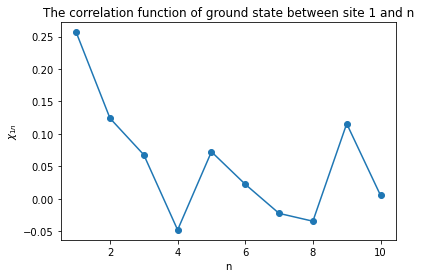

In [6]:
n_list = [i for i in range(1,N+1)]
plt.plot(n_list,chi_1n,'-o')
plt.title(r'The correlation function of ground state between site 1 and n')
plt.xlabel('n')
plt.ylabel(r'$\chi_{1n}$')

b) Calculate the temperature dependence of the spin correlation
$$\chi_{1n}(T) = \frac{1}{Z} \sum_{l} <l|\vec S_1 \cdot \vec S_n|l> e^{-\beta E_l}$$

with $Z = \sum_i e^{-\beta E_l}$the partition function, $\beta$ = 1/(kBT) ($k_B$ can be set to 1),
and |l> the eigenstates of H with eigenenergies El
, for temperatures T = 0.5, 2,and 10

The spin correlation chi(1n) in three different Temperature


,Temperature0.5,Temperature2,Temperature10
site,,,
1,0.253419-0.000000j,0.249331-0.000000j,0.248840-0.000000j
2,0.016281+0.000050j,0.000542+0.000145j,0.000414+0.000149j
3,0.018577+0.000048j,0.001902+0.000006j,0.000500-0.000020j
4,-0.010254+0.000138j,0.000987+0.000188j,0.000063+0.000181j
5,0.019535-0.000124j,0.002064-0.000165j,0.000388-0.000178j
6,0.009689-0.000129j,0.001406-0.000126j,0.000055-0.000117j
7,-0.016775+0.000087j,-0.000839+0.000141j,-0.000166+0.000122j
8,-0.007781+0.000143j,-0.000265+0.000196j,-0.000006+0.000188j
9,0.037356+0.000127j,0.002105+0.000200j,0.000098+0.000189j


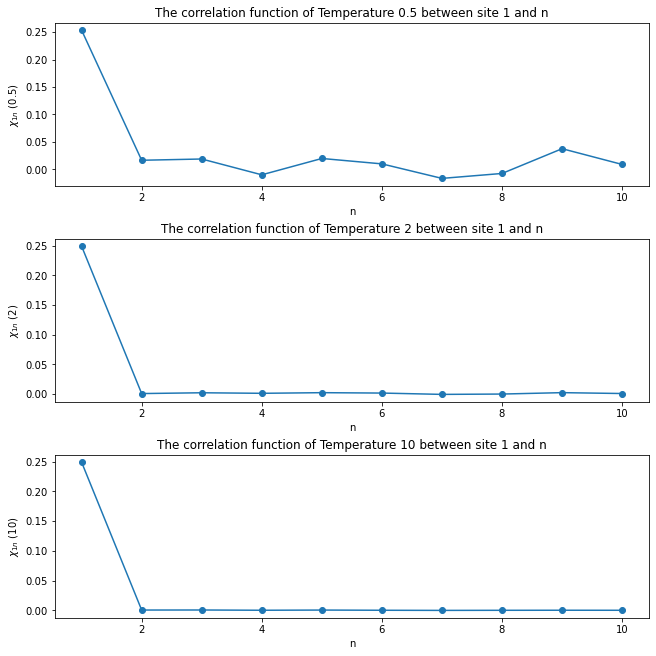

In [7]:
eigenvalue, eigenvector = w_model,v_model

T = [0.5,2,10]
index = 0
fig,ax = plt.subplots(len(T),1,figsize = (9,9),constrained_layout=True)
chi_1n_T_dataframe = pd.DataFrame({'site':n_list})
for Ti in T: #loop temperature 
    beta = 1/Ti
    Z = np.sum(np.exp(-beta*eigenvalue))
    chi_1n_T = []
    for n in range(N): #loop site n from 1 to N
        J_x = np.zeros((N,N))
        J_y = np.zeros((N,N))
        J_z = np.zeros((N,N))
        J_x[0,n] = -1
        J_y[0,n] = -1
        J_z[0,n] = -1
        chi_matrix = Cmatrix(N,J_x,J_y,J_z)
        sum = 0
        for l in range(2**N):#loop eigenstates
            sum+=np.matmul(np.matmul(np.conj(eigenvector[l]).T,chi_matrix),eigenvector[l].T)*np.exp(-beta*eigenvalue[l])
        
        chi_1n_T.append(sum/Z)
    ax[index].plot(n_list,chi_1n_T,'-o')
    ax[index].set_title(r'The correlation function of Temperature '+str(Ti)+' between site 1 and n')
    ax[index].set_xlabel('n')
    ax[index].set_ylabel(r'$\chi_{1n}$ ('+str(Ti)+')')   
    index+=1
    chi_1n_T_dataframe['Temperature'+str(Ti)] = chi_1n_T
print('The spin correlation chi(1n) in three different Temperature')
chi_1n_T_dataframe.set_index('site')

c) Show numerically that, in the limit $T \rightarrow 0$, the finite-temperature spin-correlation $\chi_{1n}(T)$ of part b) corresponds to the zero-temperature spin-correlation of part a). (2 points)

In [8]:
T0 = 0.01
beta = 1/T0
Z = np.sum(np.exp(-beta*eigenvalue))
chi_1n_T0 = []
for n in range(N): #loop site n from 1 to N
    J_x = np.zeros((N,N))
    J_y = np.zeros((N,N))
    J_z = np.zeros((N,N))
    J_x[0,n] = -1
    J_y[0,n] = -1
    J_z[0,n] = -1
    chi_matrix = Cmatrix(N,J_x,J_y,J_z)
    sum = 0
    for l in range(2**N):#loop eigenstates
        sum+=np.matmul(np.matmul(eigenvector[l],chi_matrix),eigenvector[l].T)*np.exp(-beta*eigenvalue[l])
        
    chi_1n_T0.append(sum/Z)


In [9]:
print('The spin correlation chi(1n) of T = 0.01 and ground state')
chi_1n_g0_df = pd.DataFrame({'site':n_list,'$\chi_{1n}$ of T = 0.01':chi_1n_T0,'$\chi_{1n}$ of ground state':chi_1n})
chi_1n_g0_df.set_index('site')

The spin correlation chi(1n) of T = 0.01 and ground state


,$\chi_{1n}$ of T = 0.01,$\chi_{1n}$ of ground state
site,,
1,0.256334+0.000000j,0.256779+0.000000j
2,0.124048+0.000028j,0.124111+0.000000j
3,0.067674+0.000037j,0.067737+0.000000j
4,-0.048182+0.000037j,-0.048119+0.000000j
5,0.072508-0.000038j,0.072445+0.000000j
6,0.022278+0.002280j,0.022278+0.000000j
7,-0.022621-0.000049j,-0.022621+0.000000j
8,-0.034672+0.000041j,-0.034672+0.000000j
9,0.115693+0.000041j,0.115693-0.000000j


C:\Users\Xiongxiao Wang\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


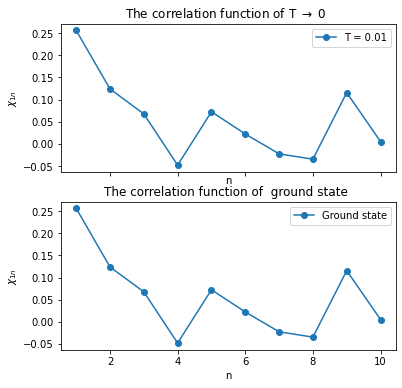

In [10]:
fig,ax1 = plt.subplots(2,figsize = (6,6),sharex = True)
ax1[0].plot(n_list,chi_1n_T0,'-o',label = r'T = 0.01')
ax1[1].plot(n_list,chi_1n,'-o',label = 'Ground state')
ax1[0].set_title(r'The correlation function of T $\rightarrow$ 0  ')
ax1[1].set_title(r'The correlation function of  ground state ')
ax1[0].set_xlabel('n')
ax1[0].set_ylabel(r'$\chi_{1n}$')
ax1[1].set_xlabel('n')
ax1[1].set_ylabel(r'$\chi_{1n}$')
ax1[0].legend()
ax1[1].legend()

These show in the limit  𝑇→0 , the finite-temperature spin-correlation  𝜒1𝑛(𝑇)  of part b) corresponds to the zero-temperature spin-correlation of part a).